### Tipología y Ciclo de Vida de los Datos
#### Práctica 2 - Limpieza y análisis de datos
#### UOC - Universitat Oberta de Catalunya

In [148]:
# Leer lo archivo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
train = pd.read_csv('train.csv')

In [149]:
train.shape

(891, 12)

In [150]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [152]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [153]:
# Miramos se hay valores nulos también en las variables de texto
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [154]:
# Creación de una variable SibSp_2: Con hermanos o cónyuge a bordo, o no
def g(x):
    if x['SibSp'] > 0: return 'Con hermanos o cónyuge'
    else: return 'Sin hermanos o cónyuge'

train['SibSp_2'] = train.apply(g, axis=1)

In [155]:
SibSp_2 = pd.crosstab(index=train['SibSp_2'],
                     columns='%')
SibSp_2/SibSp_2.sum()

col_0,%
SibSp_2,
Con hermanos o cónyuge,0.317621
Sin hermanos o cónyuge,0.682379


In [156]:
# Miramos el percentual de niños a bordo
Parch = pd.crosstab(index=train['Parch'],
                        columns='%')
Parch/Parch.sum()

col_0,%
Parch,
0,0.760943
1,0.132435
2,0.089787
3,0.005612
4,0.004489
5,0.005612
6,0.001122


In [157]:
def h(x):
        if x['Parch'] > 0: return 'Con hijos a bordo'
        else: return 'Sin hijos a abordo'

train['Parch_2'] = train.apply(h,axis=1)

In [158]:
Parch_2 = pd.crosstab(index=train['Parch_2'],
                     columns='%')
Parch_2/Parch_2.sum()

col_0,%
Parch_2,
Con hijos a bordo,0.239057
Sin hijos a abordo,0.760943


In [159]:
Embarked_2 = pd.crosstab(index=train['Embarked'],
                     columns='count')
Embarked_2

col_0,count
Embarked,
C,168
Q,77
S,644


In [160]:
Embarked_2/Embarked_2.sum()

col_0,count
Embarked,
C,0.188976
Q,0.086614
S,0.724409


#### Input Vacíos: Embarked

In [161]:
# Remplazar null por 'S' en la columna Emparked
train = train.fillna({'Embarked': 'S'})

In [162]:
Embarked_2 = pd.crosstab(index=train['Embarked'],
                     columns='count')
Embarked_2

col_0,count
Embarked,
C,168
Q,77
S,646


#### Input Vacíos: Age

In [163]:
# Para imputar los vacíos de la edad, vamos a utilizar el RandomForestRegressor de la libraría sklearn
from sklearn.ensemble import RandomForestRegressor

In [164]:
# Separamos los datos de los que tienen la edad y los que no
train_edad = train[pd.isnull(train['Age']) == False]
train_sin_edad = train[pd.isnull(train['Age'])]

In [165]:
# Aquí se hace las dumies de algunas variables que vamos a utilizar para el input
puerto_edad = pd.get_dummies(train_edad['Embarked'])
puerto_sin_edad = pd.get_dummies(train_sin_edad['Embarked'])

In [166]:
SibSp_2_edad = pd.get_dummies(train_edad['SibSp_2'])
SibSp_2_sin_edad = pd.get_dummies(train_sin_edad['SibSp_2'])

In [167]:
Parch_2_edad = pd.get_dummies(train_edad['Parch_2'])
Parch_2_sin_edad = pd.get_dummies(train_sin_edad['Parch_2'])

In [168]:
Sex_edad = pd.get_dummies(train_edad['Sex'])
Sex_sin_edad = pd.get_dummies(train_sin_edad['Sex'])

In [169]:
x = ['Pclass', 'Fare', 'Age']

In [170]:
train_edad = train_edad[x]
train_sin_edad = train_sin_edad[x]

In [171]:
train_edad = pd.concat([train_edad, puerto_edad, SibSp_2_edad, Parch_2_edad, Sex_edad], axis = 1)
train_sin_edad = pd.concat([train_sin_edad, puerto_sin_edad, SibSp_2_sin_edad, Parch_2_sin_edad, Sex_sin_edad], axis = 1)

In [172]:
train_sin_edad.head()

,Pclass,Fare,Age,C,Q,S,Con hermanos o cónyuge,Sin hermanos o cónyuge,Con hijos a bordo,Sin hijos a abordo,female,male
5,3,8.4583,NaN,0,1,0,0,1,0,1,0,1
17,2,13.0000,NaN,0,0,1,0,1,0,1,0,1
19,3,7.2250,NaN,1,0,0,0,1,0,1,1,0
26,3,7.2250,NaN,1,0,0,0,1,0,1,0,1
28,3,7.8792,NaN,0,1,0,0,1,0,1,1,0


In [173]:
# Variables para acer la clasificación
variables = ['Pclass', 'Fare', 'C', 'Q', 'S', 'Con hermanos o cónyuge', 'Sin hermanos o cónyuge', 
             'Con hijos a bordo', 'Sin hijos a abordo', 'female', 'male']

In [174]:
edad_model = RandomForestRegressor()

In [175]:
edad_model.fit(train_edad[variables], train_edad['Age'])

C:\Users\gisel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [176]:
predict_age = edad_model.predict(X = train_sin_edad[variables])

In [177]:
predict_age

array([36.42277778, 32.55360265, 14.7       , 30.08040404, 21.24625   ,
       27.06893087, 38.11666667, 23.93958333, 25.33777778, 31.8       ,
       32.13346134, 38.82611111, 23.93958333, 20.875     , 42.78833333,
       40.05      , 19.5       , 27.06893087, 32.13346134, 21.09958333,
       32.13346134, 32.13346134, 27.06893087, 28.98168831, 20.7       ,
       32.13346134, 52.62777778,  2.5610119 , 20.2       , 30.30919643,
       24.40742063, 32.31916667, 27.5       , 51.375     , 20.16      ,
       39.42      , 30.6       , 40.9       , 26.15      , 52.62777778,
       23.93958333, 32.31916667, 47.95527778, 27.06893087, 18.83333333,
       21.3       , 16.16166667, 26.15      , 30.30919643, 32.3       ,
       52.62777778, 23.93958333, 47.28214286, 23.93958333, 36.74613632,
       53.29444444, 40.05      , 47.84880952, 23.93958333, 32.19777778,
       29.5625    , 32.13346134, 29.2       , 32.31916667, 21.1       ,
       35.8       , 27.06893087, 26.25      , 56.155     , 30.08

In [178]:
# Como quedamos con números en el formato float, vamos cambiarlos para números enteros
train_sin_edad['Age'] = predict_age.astype(int)

In [179]:
# Y luego juntamos los dos dataframes
train2 = train_edad.append(train_sin_edad)

In [180]:
train2.reset_index(inplace=True)
train2.drop('index',inplace=True,axis=1)

In [181]:
train2.head()

,Pclass,Fare,Age,C,Q,S,Con hermanos o cónyuge,Sin hermanos o cónyuge,Con hijos a bordo,Sin hijos a abordo,female,male
0,3,7.2500,22.0,0,0,1,1,0,0,1,0,1
1,1,71.2833,38.0,1,0,0,1,0,0,1,1,0
2,3,7.9250,26.0,0,0,1,0,1,0,1,1,0
3,1,53.1000,35.0,0,0,1,1,0,0,1,1,0
4,3,8.0500,35.0,0,0,1,0,1,0,1,0,1


In [182]:
# Unir los dos dataframes para quedar también con la edad que hicimos el input (age_fin)
train3 = train.join(train2, lsuffix='_inicial', rsuffix='_fin')
train3.head()

,PassengerId,Survived,Pclass_inicial,Name,Sex,Age_inicial,SibSp,Parch,Ticket,Fare_inicial,Cabin,Embarked,SibSp_2,Parch_2,Pclass_fin,Fare_fin,Age_fin,C,Q,S,Con hermanos o cónyuge,Sin hermanos o cónyuge,Con hijos a bordo,Sin hijos a abordo,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Con hermanos o cónyuge,Sin hijos a abordo,3,7.2500,22.0,0,0,1,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Con hermanos o cónyuge,Sin hijos a abordo,1,71.2833,38.0,1,0,0,1,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Sin hermanos o cónyuge,Sin hijos a abordo,3,7.9250,26.0,0,0,1,0,1,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Con hermanos o cónyuge,Sin hijos a abordo,1,53.1000,35.0,0,0,1,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Sin hermanos o cónyuge,Sin hijos a abordo,3,8.0500,35.0,0,0,1,0,1,0,1,0,1


In [183]:
# Borramos la columna Fare_fin y Pclass_fin ya que no hay diferencias entre los valores con la Fare_inicial y la Pclass_inicial
train3 = train3.drop(columns=['Fare_fin', 'Pclass_fin'])

In [184]:
# Renombrando columnas que no tenemos más iguales
train3 = train3.rename(columns={"Pclass_inicial": "Pclass", "Fare_inicial": "Fare"})

In [185]:
train3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age_inicial',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SibSp_2',
       'Parch_2', 'Age_fin', 'C', 'Q', 'S', 'Con hermanos o cónyuge',
       'Sin hermanos o cónyuge', 'Con hijos a bordo', 'Sin hijos a abordo',
       'female', 'male'],
      dtype='object')

#### Outliers

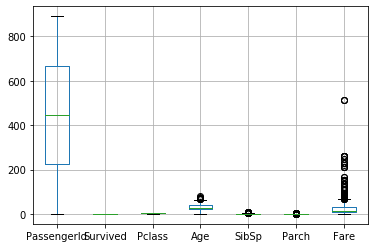

In [186]:
# Comprobando outliers de los datos originales
train.boxplot()
plt.means=True

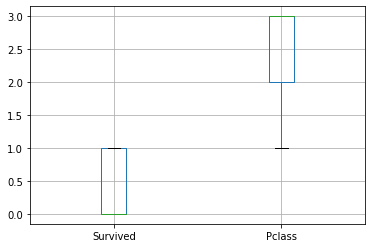

In [187]:
# Comprobando outliers
train.boxplot(column=['Survived', 'Pclass'])
plt.means=True

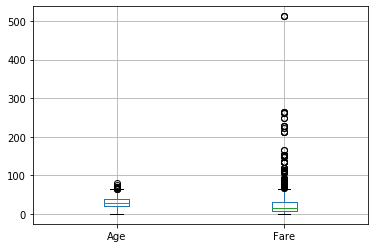

In [188]:
# Comprobando outliers
train.boxplot(column=['Age', 'Fare'])
plt.means=True

Text(0, 0.5, 'Cantidad')

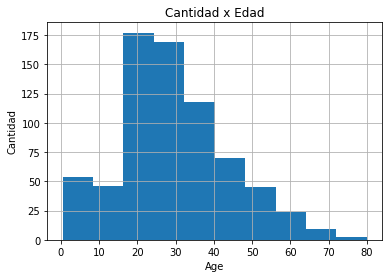

In [189]:
# Distribuición normal o no de la edad
train.hist('Age')
plt.title('Cantidad x Edad')
plt.xlabel('Age')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

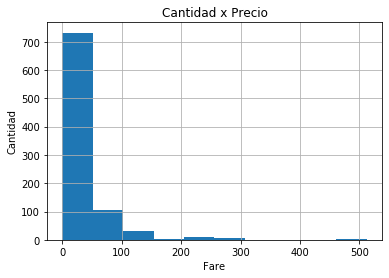

In [190]:
# Distribuición normal o no del precio
train.hist('Fare')
plt.title('Cantidad x Precio')
plt.xlabel('Fare')
plt.ylabel('Cantidad')

In [191]:
train.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


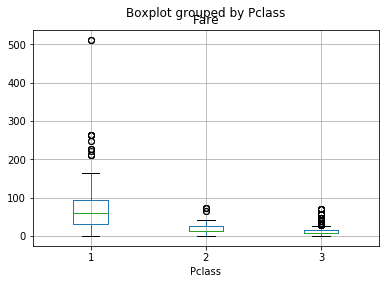

In [192]:
boxplot = train.boxplot(column=['Fare'],by='Pclass')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3BFA03390>,
      dtype=object)

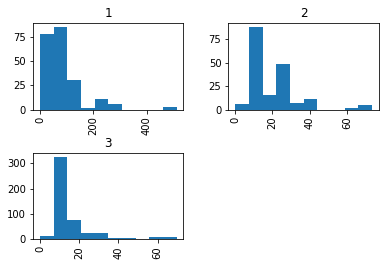

In [193]:
train['Fare'].hist(by=train['Pclass'])

In [194]:
# Outliers para la variable Precio (Fare), pero en el dataset ya con input de edad: train3
IQR = train3.Fare.describe()[6] - train3.Fare.describe()[4]
cuartil_sup_fare = train3.Fare.quantile(0.75) + IQR * 3
cuartil_inf_fare = train3.Fare.quantile(0.25) - IQR * 3

In [195]:
print('Rango del Fare con cuartil superior: {a} y cuartil inferior {b}'.format(a = cuartil_sup_fare, b = cuartil_inf_fare))

Rango del Fare con cuartil superior: 100.2688 y cuartil inferior -61.358399999999996


In [196]:
print('Cantidad de registros a cambiar: {}'.format(train3[train3['Fare']>100].count()[0]))

Cantidad de registros a cambiar: 53


In [197]:
# Precio medio de la primera clase, no considerando los outliers
train3[(train3['Pclass']==1) & (train3['Fare']<100)]['Fare'].mean()

50.70350306748466

In [198]:
train3[train3['Pclass']==1]['Fare'].mean()

84.15468749999992

In [199]:
print(train3.groupby('Pclass')['Fare'].mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [200]:
# Vamos a hacer una función para remplazar los outliers
def outlier_fare(df):
    df['Fare'] = np.where(df['Fare']>100, np.random.randint(45, 60,1)[0], df['Fare'])
    df['Fare'] = np.where(((df['Fare']==0) & (df['Pclass']==1)), 50, df['Fare'])
    df['Fare'] = np.where(((df['Fare']==0) & (df['Pclass']==2)), 20, df['Fare'])
    df['Fare'] = np.where(((df['Fare']==0) & (df['Pclass']==3)), 13, df['Fare'])

In [201]:
outlier_fare(train3)

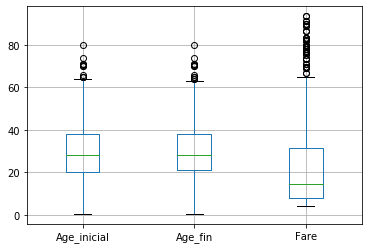

In [202]:
# Comprobando outliers
train3.boxplot(column=['Age_inicial', 'Age_fin', 'Fare'])
plt.means=True

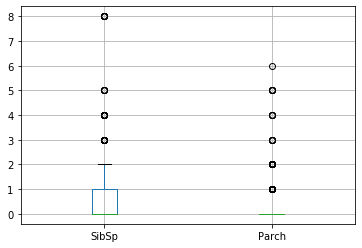

In [203]:
train.boxplot(column=['SibSp', 'Parch'])
plt.means=True

#### Análisis de los datos

In [253]:
train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_inicial,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_2,Parch_2,Age_fin,C,Q,S,Con hermanos o cónyuge,Sin hermanos o cónyuge,Con hijos a bordo,Sin hijos a abordo,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Con hermanos o cónyuge,Sin hijos a abordo,22.0,0,0,1,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Con hermanos o cónyuge,Sin hijos a abordo,38.0,1,0,0,1,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Sin hermanos o cónyuge,Sin hijos a abordo,26.0,0,0,1,0,1,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Con hermanos o cónyuge,Sin hijos a abordo,35.0,0,0,1,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Sin hermanos o cónyuge,Sin hijos a abordo,35.0,0,0,1,0,1,0,1,0,1


In [254]:
train4 = train3.drop(columns=['Name', 'Age_inicial', 'SibSp', 'Parch', 'Ticket', 'Cabin'])

In [255]:
train4.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,SibSp_2,Parch_2,Age_fin,C,Q,S,Con hermanos o cónyuge,Sin hermanos o cónyuge,Con hijos a bordo,Sin hijos a abordo,female,male
0,1,0,3,male,7.2500,S,Con hermanos o cónyuge,Sin hijos a abordo,22.0,0,0,1,1,0,0,1,0,1
1,2,1,1,female,71.2833,C,Con hermanos o cónyuge,Sin hijos a abordo,38.0,1,0,0,1,0,0,1,1,0
2,3,1,3,female,7.9250,S,Sin hermanos o cónyuge,Sin hijos a abordo,26.0,0,0,1,0,1,0,1,1,0
3,4,1,1,female,53.1000,S,Con hermanos o cónyuge,Sin hijos a abordo,35.0,0,0,1,1,0,0,1,1,0
4,5,0,3,male,8.0500,S,Sin hermanos o cónyuge,Sin hijos a abordo,35.0,0,0,1,0,1,0,1,0,1


In [256]:
# Miramos el % de los sobrevivientes
Survived2 = pd.crosstab(index=train['Survived'],
                     columns='%')
Survived2/Survived2.sum()

col_0,%
Survived,
0,0.616162
1,0.383838


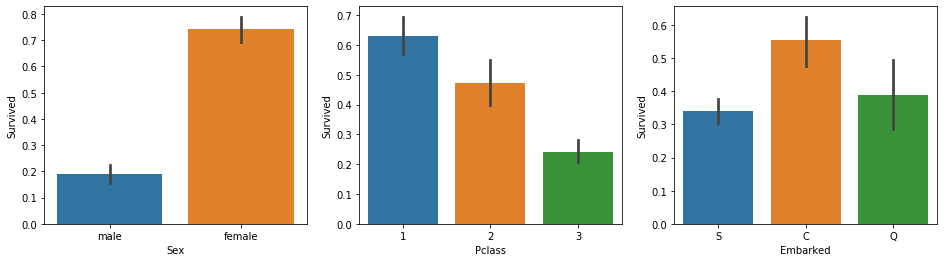

In [257]:
# Mirando el grupo que tenía más probabilidad de subrevivir
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(16,4))

sns.barplot(x='Sex', y='Survived', data=train4, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train4, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train4, ax=axis3)

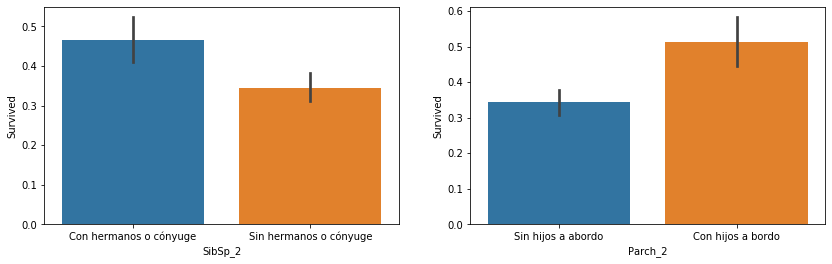

In [258]:
fig, (axis4, axis5) = plt.subplots(1,2, figsize=(14,4))

sns.barplot(x='SibSp_2', y='Survived', data=train4, ax=axis4)
sns.barplot(x='Parch_2', y='Survived', data=train4, ax=axis5)

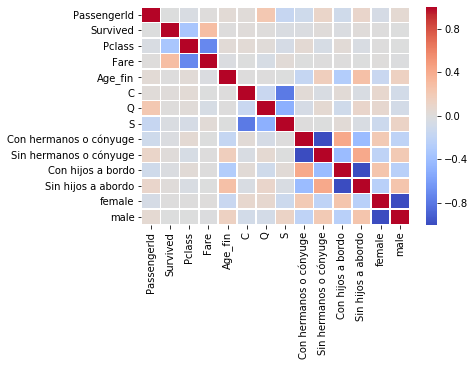

In [259]:
# Correlación de las variables numéricas
sns.heatmap(train4.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.5, vmax=1.0, linecolor='white')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C27500B8>,
      dtype=object)

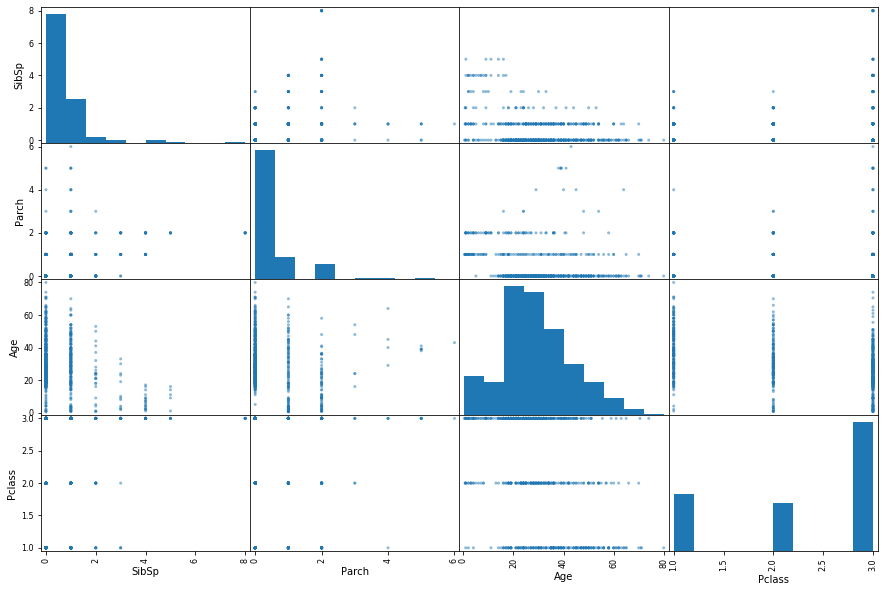

In [260]:
# Haciendo un cruze con las variables
columns=['SibSp','Parch','Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10))

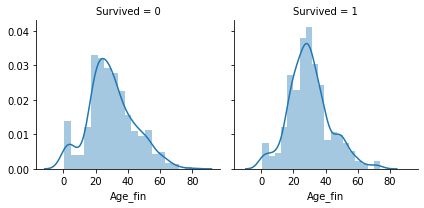

In [261]:
# Comprobar si la edad influe en la probabilidad de subreviviencia
age_survived = sns.FacetGrid(train4, col='Survived')
age_survived.map(sns.distplot, 'Age_fin')

In [262]:
# Correlación entre las variables edad (Age_fin) y Survived
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import pearsonr

In [263]:
(Rho, p_value) = pearsonr(train4['Age_fin'], train4['Survived'])
print('Coeficiente de Correlación - Pearson:´{:.2f}'.format(Rho))
print('P-value: {}'.format(p_value))

Coeficiente de Correlación - Pearson:´0.00
P-value: 0.8833704575404359


In [264]:
# Exploración de los datos con regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [265]:
model_1 = sm.Logit(train4['Survived'], train4[['Pclass', 'Age_fin', 'Fare', 
                                               'Con hermanos o cónyuge', 
                                               'Con hijos a bordo', 'S', 'C', 
                                               'Q', 'female']])
model_2 = model_1.fit(method='bfgs')
print(model_2.pvalues)
model_2.summary()

         Current function value: 0.604258
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Pclass                    4.945309e-08
Age_fin                   6.241771e-01
Fare                      2.182494e-02
Con hermanos o cónyuge    9.675020e-01
Con hijos a bordo         8.626623e-01
S                         1.455160e-01
C                         6.638382e-02
Q                         7.642544e-02
female                    8.486693e-01
dtype: float64


C:\Users\gisel\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Jan 2020   Pseudo R-squ.:                 0.09259
Time:                        20:06:30   Log-Likelihood:                -538.39
converged:                      False   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.053e-20
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Pclass                    -0.6636      0.122     -5.453      0.000      -0.902      -0.425
Age_fin                    0.0027      0.006      0.490      0.624      -0.008       0.014
Fare                       0.0111      0.005      2.293      0.022       0.002       0.021
Con hermanos o cónyuge    -0.0072      0.176     -0.041      0.968      -0.353       0.338
Con hijos a bordo         -0.0347      0.200     -0.173      0.863      -0.427       0.358
S                          0.6003      0.412      1.456      0.146      -0.208       1.409
C                          0.8241      0.449      1.836      0.066      -0.056       1.704
Q                          0.8351      0.471      1.772      0.076      -0.089       1.759
female                     0.0309      0.162      0.191      0.849      -0.286       0.348
==========================================================================================
"""

In [267]:
print(model_2.pvalues)

Pclass                    4.945309e-08
Age_fin                   6.241771e-01
Fare                      2.182494e-02
Con hermanos o cónyuge    9.675020e-01
Con hijos a bordo         8.626623e-01
S                         1.455160e-01
C                         6.638382e-02
Q                         7.642544e-02
female                    8.486693e-01
dtype: float64


#### Modelo de input y verificación de la precisión del modelo

In [237]:
# Quedamos con las variables a utilizar:
train5 = train4.drop(columns=['PassengerId', 'Sex', 'Embarked', 'SibSp_2', 'Parch_2', 
                              'Sin hermanos o cónyuge', 'Sin hijos a abordo', 'male'])

In [238]:
train5.head()

,Survived,Pclass,Fare,Age_fin,C,Q,S,Con hermanos o cónyuge,Con hijos a bordo,female
0,0,3,7.2500,22.0,0,0,1,1,0,0
1,1,1,71.2833,38.0,1,0,0,1,0,1
2,1,3,7.9250,26.0,0,0,1,0,0,1
3,1,1,53.1000,35.0,0,0,1,1,0,1
4,0,3,8.0500,35.0,0,0,1,0,0,0


In [278]:
# Modelo: KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [284]:
x_train, x_test, y_train, y_test = train_test_split(train5.drop('Survived',axis=1),
                                                    train5['Survived'],
                                                    test_size=0.3,
                                                    random_state=1, stratify=y)

In [290]:
knn = KNeighborsClassifier (n_neighbors = 2)

In [291]:
knn.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [292]:
# Miramos la precisión del modelo:
knn.score(x_test, y_test)

0.6194029850746269

In [294]:
# Modelo: GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [295]:
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [296]:
# Precisión del modelo:
clf.score(x_test, y_test)

0.6716417910447762

In [297]:
# Aquí se guarda el dataframe en formato csv con los datos finales utilizados (train5)
train5.to_csv('train5.csv', index = False)